epoch:0, train acc:0.11, test acc:0.0966
epoch:1, train acc:0.12, test acc:0.0977
epoch:2, train acc:0.12, test acc:0.0979
epoch:3, train acc:0.12, test acc:0.0995
epoch:4, train acc:0.12, test acc:0.1015
epoch:5, train acc:0.13, test acc:0.1036
epoch:6, train acc:0.15, test acc:0.1067
epoch:7, train acc:0.16, test acc:0.1089
epoch:8, train acc:0.2, test acc:0.1132
epoch:9, train acc:0.2, test acc:0.1154
epoch:10, train acc:0.19, test acc:0.1155
epoch:11, train acc:0.2, test acc:0.1173
epoch:12, train acc:0.21, test acc:0.1197
epoch:13, train acc:0.22, test acc:0.1235
epoch:14, train acc:0.24, test acc:0.1294
epoch:15, train acc:0.26, test acc:0.1334
epoch:16, train acc:0.25, test acc:0.1342
epoch:17, train acc:0.26, test acc:0.1395
epoch:18, train acc:0.26, test acc:0.1419
epoch:19, train acc:0.26, test acc:0.1405
epoch:20, train acc:0.26, test acc:0.14
epoch:21, train acc:0.27, test acc:0.1436
epoch:22, train acc:0.27, test acc:0.146
epoch:23, train acc:0.3, test acc:0.1483
epoch:24,

epoch:195, train acc:1.0, test acc:0.584
epoch:196, train acc:1.0, test acc:0.5826
epoch:197, train acc:1.0, test acc:0.5835
epoch:198, train acc:1.0, test acc:0.5848
epoch:199, train acc:1.0, test acc:0.5879
epoch:200, train acc:1.0, test acc:0.5861


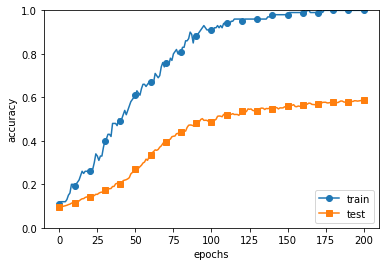

In [16]:
#Weight Decayなし
%matplotlib inline
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:100]
t_train = t_train[:100]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.13, test acc:0.0989
epoch:1, train acc:0.18, test acc:0.1027
epoch:2, train acc:0.18, test acc:0.1064
epoch:3, train acc:0.18, test acc:0.1118
epoch:4, train acc:0.21, test acc:0.1105
epoch:5, train acc:0.23, test acc:0.1165
epoch:6, train acc:0.23, test acc:0.1204
epoch:7, train acc:0.22, test acc:0.1187
epoch:8, train acc:0.25, test acc:0.1214
epoch:9, train acc:0.24, test acc:0.1231
epoch:10, train acc:0.24, test acc:0.126
epoch:11, train acc:0.26, test acc:0.1275
epoch:12, train acc:0.26, test acc:0.1298
epoch:13, train acc:0.26, test acc:0.1326
epoch:14, train acc:0.28, test acc:0.1357
epoch:15, train acc:0.29, test acc:0.139
epoch:16, train acc:0.3, test acc:0.1415
epoch:17, train acc:0.34, test acc:0.1487
epoch:18, train acc:0.36, test acc:0.1523
epoch:19, train acc:0.33, test acc:0.1508
epoch:20, train acc:0.33, test acc:0.1535
epoch:21, train acc:0.35, test acc:0.1614
epoch:22, train acc:0.35, test acc:0.1627
epoch:23, train acc:0.35, test acc:0.1636
epoch

epoch:194, train acc:0.95, test acc:0.5768
epoch:195, train acc:0.96, test acc:0.5883
epoch:196, train acc:0.95, test acc:0.5933
epoch:197, train acc:0.96, test acc:0.5939
epoch:198, train acc:0.96, test acc:0.5912
epoch:199, train acc:0.95, test acc:0.5925
epoch:200, train acc:0.95, test acc:0.5967


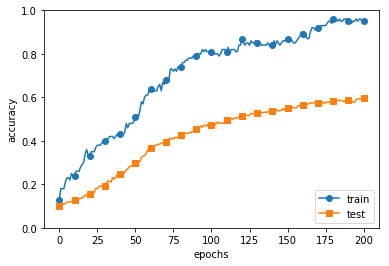

In [17]:
#Weight Decayあり
%matplotlib inline
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:100]
t_train = t_train[:100]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.05
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.356158028897777
=== epoch:1, train acc:0.11, test acc:0.0808 ===
train loss:2.4016788153855027
=== epoch:2, train acc:0.1, test acc:0.0821 ===
train loss:2.371073135250691
=== epoch:3, train acc:0.11, test acc:0.0865 ===
train loss:2.2983048610709513
=== epoch:4, train acc:0.13, test acc:0.0896 ===
train loss:2.2800253675178177
=== epoch:5, train acc:0.13, test acc:0.0946 ===
train loss:2.317913285889792
=== epoch:6, train acc:0.13, test acc:0.1 ===
train loss:2.273037663896198
=== epoch:7, train acc:0.13, test acc:0.1015 ===
train loss:2.2855779020721227
=== epoch:8, train acc:0.14, test acc:0.1036 ===
train loss:2.339688438920301
=== epoch:9, train acc:0.14, test acc:0.1047 ===
train loss:2.2551264379734457
=== epoch:10, train acc:0.16, test acc:0.1112 ===
train loss:2.2174219719654236
=== epoch:11, train acc:0.16, test acc:0.1142 ===
train loss:2.266670125834094
=== epoch:12, train acc:0.16, test acc:0.1176 ===
train loss:2.1531025152579186
=== epoch:13, train acc:0.19,

train loss:1.1968785293770157
=== epoch:105, train acc:0.75, test acc:0.4541 ===
train loss:1.1903379436528627
=== epoch:106, train acc:0.78, test acc:0.4563 ===
train loss:1.1523711483052193
=== epoch:107, train acc:0.77, test acc:0.4578 ===
train loss:1.0590491579788766
=== epoch:108, train acc:0.78, test acc:0.4595 ===
train loss:1.0920847154873654
=== epoch:109, train acc:0.78, test acc:0.4608 ===
train loss:1.0848292345098014
=== epoch:110, train acc:0.78, test acc:0.4629 ===
train loss:0.978838093317349
=== epoch:111, train acc:0.8, test acc:0.4729 ===
train loss:1.0027104642623832
=== epoch:112, train acc:0.8, test acc:0.4739 ===
train loss:1.0293040962695645
=== epoch:113, train acc:0.79, test acc:0.4717 ===
train loss:0.941362633224554
=== epoch:114, train acc:0.79, test acc:0.4628 ===
train loss:1.0052642762878947
=== epoch:115, train acc:0.8, test acc:0.4692 ===
train loss:0.8489764100822015
=== epoch:116, train acc:0.79, test acc:0.4694 ===
train loss:0.9938202200476257
===

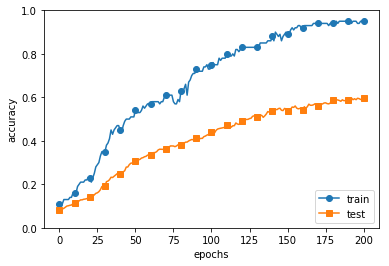

In [27]:
#Dropout
%matplotlib inline
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:100]
t_train = t_train[:100]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.020
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=201, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [1]:
import numpy as np

a=np.random.randn(5,5)

print(np.std(a))
print(np.average(a))
print(sum(a))
a

0.9244978831279251
0.04378589971316335
[-3.46997279 -0.65850135  1.3191361   1.13644244  2.76754309]


array([[-1.43202373, -1.10656849,  0.2729797 ,  0.5350266 ,  0.89945765],
       [-1.32578502, -0.38791643, -0.15109236,  1.12554683,  1.08674063],
       [ 0.83926519,  0.92982307,  0.28098189,  0.26272615, -0.07285569],
       [-0.39201637, -1.48711674, -0.34939219,  0.38965684, -0.46559075],
       [-1.15941285,  1.39327723,  1.26565906, -1.17651398,  1.31979125]])

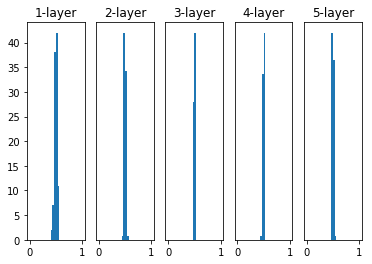

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()